# Aerofit - Treadmill Buyer Profile

## Table of Contents
* [Assignment](#Assignment)
* [Data Description](#Data-Description)
* [Data Exploration](#Data-Exploration)
  * [Distance Plot](#Distance-Plot)

## Assignment

The market research team at AeroFit wants to identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to new customers. The team decides to investigate whether there are differences across the product with respect to customer characteristics.

Perform descriptive analytics to create a customer profile for each AeroFit treadmill product by developing appropriate tables and charts. For each AeroFit treadmill product, construct two-way contingency tables and compute all conditional and marginal probabilities along with their insights/impact on the business.

Product Portfolio:

* The KP281 is an entry-level treadmill that sells for `$1,500` ;
* The KP281 is an entry-level treadmill that sells for `$1,500` ;
* The KP481 is for mid-level runners and sells for `$1,750` ;
* The KP781 treadmill is having advanced features and it sells for `$2,500` .

## Data Description

The company collected data on individuals who purchased a treadmill from the AeroFit stores during the prior three months. The dataset in aerofit_treadmill_data.csv has the following features:

* `Product` - product purchased: KP281, KP481, or KP781


* `Age` - in years


* `Gender` - male/female


* `Education` - in years


* `MaritalStatus` - single or partnered


* `Usage` - the average number of times the customer plans to use the treadmill each week


* `Fitness` - self-rated fitness on a 1-5 scale, where 1 is the poor shape and 5 is the excellent shape


* `Income` - annual income in US dollar


* `Miles` - the average number of miles the customer expects to walk/run each week

## Data Exploration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.filterwarnings("ignore")

In [2]:
aerofit_treadmill_data = pd.read_csv('aerofit_treadmill_data.csv')
aerofit_treadmill_data.head(3)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66


In [3]:
aerofit_treadmill_data.shape

(180, 9)

In [4]:
aerofit_treadmill_data.dtypes

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

In [5]:
aerofit_treadmill_data['Product'] = aerofit_treadmill_data['Product'].astype('category')

aerofit_treadmill_data['Gender'] = aerofit_treadmill_data['Gender'].astype('category')

aerofit_treadmill_data['MaritalStatus'] = aerofit_treadmill_data['MaritalStatus'].astype('category')

In [6]:
aerofit_treadmill_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Product        180 non-null    category
 1   Age            180 non-null    int64   
 2   Gender         180 non-null    category
 3   Education      180 non-null    int64   
 4   MaritalStatus  180 non-null    category
 5   Usage          180 non-null    int64   
 6   Fitness        180 non-null    int64   
 7   Income         180 non-null    int64   
 8   Miles          180 non-null    int64   
dtypes: category(3), int64(6)
memory usage: 9.5 KB


Skewness is a statistical measure that describes the asymmetry of a data distribution. It quantifies the extent and direction of skew (departure from horizontal symmetry) from a normal distribution.

* If the skewness is less than 0, the data is said to be left-skewed, meaning that the left tail is longer or fatter than the right tail.


* If the skewness is greater than 0, the data is right-skewed, meaning that the right tail is longer or fatter than the left tail.


* If the skewness is close to 0, the data distribution is quite symmetrical, but still, it doesn't indicate it follows a normal distribution.

In [7]:
aerofit_treadmill_data.skew()

Age          0.982161
Education    0.622294
Usage        0.739494
Fitness      0.454800
Income       1.291785
Miles        1.724497
dtype: float64

In [8]:
aerofit_treadmill_data.describe(include = 'all')

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.000000,180,180.000000,180,180.000000,180.000000,180.000000,180.000000
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,KP281,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,28.788889,NaN,15.572222,NaN,3.455556,3.311111,53719.577778,103.194444
std,NaN,6.943498,NaN,1.617055,NaN,1.084797,0.958869,16506.684226,51.863605
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.000000,29562.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.000000,44058.750000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.000000,50596.500000,94.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,4.000000,58668.000000,114.750000


In [9]:
aerofit_treadmill_data.isna().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [11]:
aerofit_treadmill_data.duplicated(subset = None,keep='first').sum()

0

#### Observations:

* There are no missing values in the data.


* There are no dublicated values in the data.


* There are 3 unique products in the dataset.


* KP281 is the most frequent product.


* Minimum & Maximum age of the person is 18 & 50, mean is 28.79, and 75% of persons have an age less than or equal to 33.


* Most of the people are having 16 years of education i.e. 75% of persons are having education <= 16 years.


* Out of 180 data points, 104's gender is Male and rest are the Female.


* Standard deviation for Income & Miles is very high. These variables might have outliers in them.

In [12]:
aerofit_treadmill_data['Product'].value_counts()

KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64

In [13]:
aerofit_treadmill_data['MaritalStatus'].value_counts()

Partnered    107
Single        73
Name: MaritalStatus, dtype: int64

In [14]:
aerofit_treadmill_data['Gender'].value_counts()

Male      104
Female     76
Name: Gender, dtype: int64

In [15]:
aerofit_treadmill_data.nunique()

Product           3
Age              32
Gender            2
Education         8
MaritalStatus     2
Usage             6
Fitness           5
Income           62
Miles            37
dtype: int64

In [16]:
aerofit_treadmill_data['Product'].unique()

['KP281', 'KP481', 'KP781']
Categories (3, object): ['KP281', 'KP481', 'KP781']

In [17]:
aerofit_treadmill_data['Age'].unique()

array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 43, 44, 46, 47, 50, 45, 48, 42])

In [18]:
aerofit_treadmill_data['Gender'].unique()

['Male', 'Female']
Categories (2, object): ['Female', 'Male']

In [19]:
aerofit_treadmill_data['Education'].unique()

array([14, 15, 12, 13, 16, 18, 20, 21])

In [20]:
aerofit_treadmill_data['MaritalStatus'].unique()

['Single', 'Partnered']
Categories (2, object): ['Partnered', 'Single']

In [21]:
aerofit_treadmill_data['Usage'].unique()

array([3, 2, 4, 5, 6, 7])

In [22]:
aerofit_treadmill_data['Fitness'].unique()

array([4, 3, 2, 1, 5])

In [23]:
aerofit_treadmill_data['Income'].unique()

array([ 29562,  31836,  30699,  32973,  35247,  37521,  36384,  38658,
        40932,  34110,  39795,  42069,  44343,  45480,  46617,  48891,
        53439,  43206,  52302,  51165,  50028,  54576,  68220,  55713,
        60261,  67083,  56850,  59124,  61398,  57987,  64809,  47754,
        65220,  62535,  48658,  54781,  48556,  58516,  53536,  61006,
        57271,  52291,  49801,  62251,  64741,  70966,  75946,  74701,
        69721,  83416,  88396,  90886,  92131,  77191,  52290,  85906,
       103336,  99601,  89641,  95866, 104581,  95508])

In [24]:
aerofit_treadmill_data['Miles'].unique()

array([112,  75,  66,  85,  47, 141, 103,  94, 113,  38, 188,  56, 132,
       169,  64,  53, 106,  95, 212,  42, 127,  74, 170,  21, 120, 200,
       140, 100,  80, 160, 180, 240, 150, 300, 280, 260, 360])

## Distance Plot

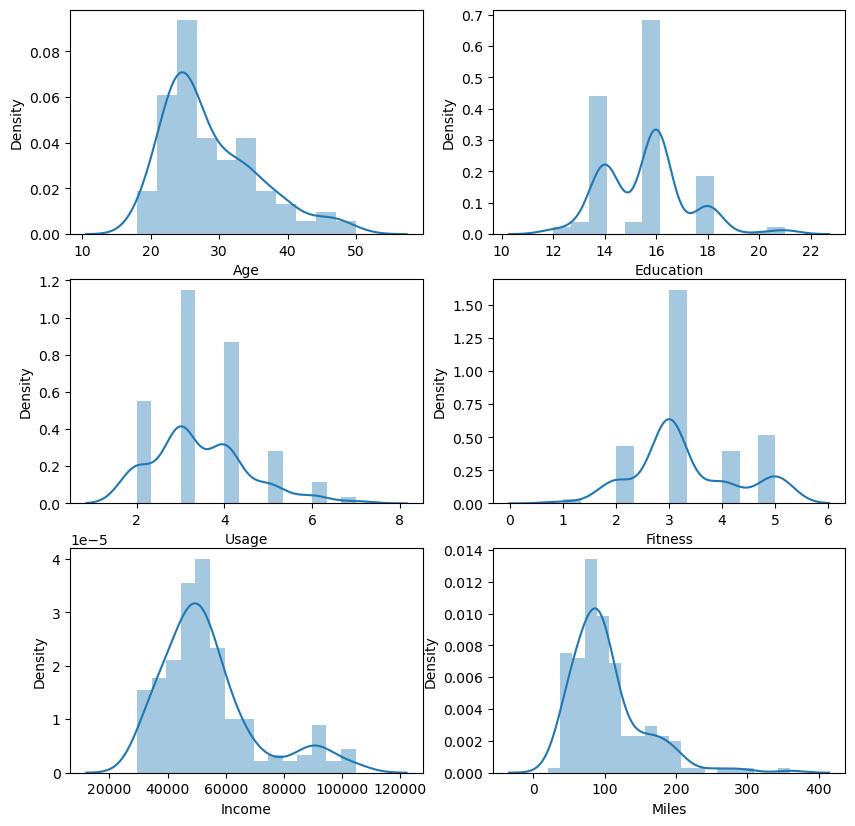

In [31]:
fig, axis = plt.subplots(nrows = 3, ncols = 2, figsize = (10,7))
fig.subplots_adjust(top = 1.2)

sns.distplot(aerofit_treadmill_data['Age'], kde = True, ax = axis[0,0])
sns.distplot(aerofit_treadmill_data['Education'], kde = True, ax = axis[0,1])
sns.distplot(aerofit_treadmill_data['Usage'], kde = True, ax = axis[1,0])
sns.distplot(aerofit_treadmill_data['Fitness'], kde = True, ax = axis[1,1])
sns.distplot(aerofit_treadmill_data['Income'], kde = True, ax = axis[2,0])
sns.distplot(aerofit_treadmill_data['Miles'], kde = True, ax = axis[2,1])
plt.show()

#### Observations:

* Both **Miles** and **Income** have significant outliers based on the above distribution.

* Also **Miles** and **Income** are "right-skewed distribution" which means the mass of the distribution is concentrated on the left of the figure.

* Customer with fitness level 3 buy a major chuck of treadmills.

* Majority of Customers fall within the `$ 45,000 - $ 60,000` income range.

### Count Plot

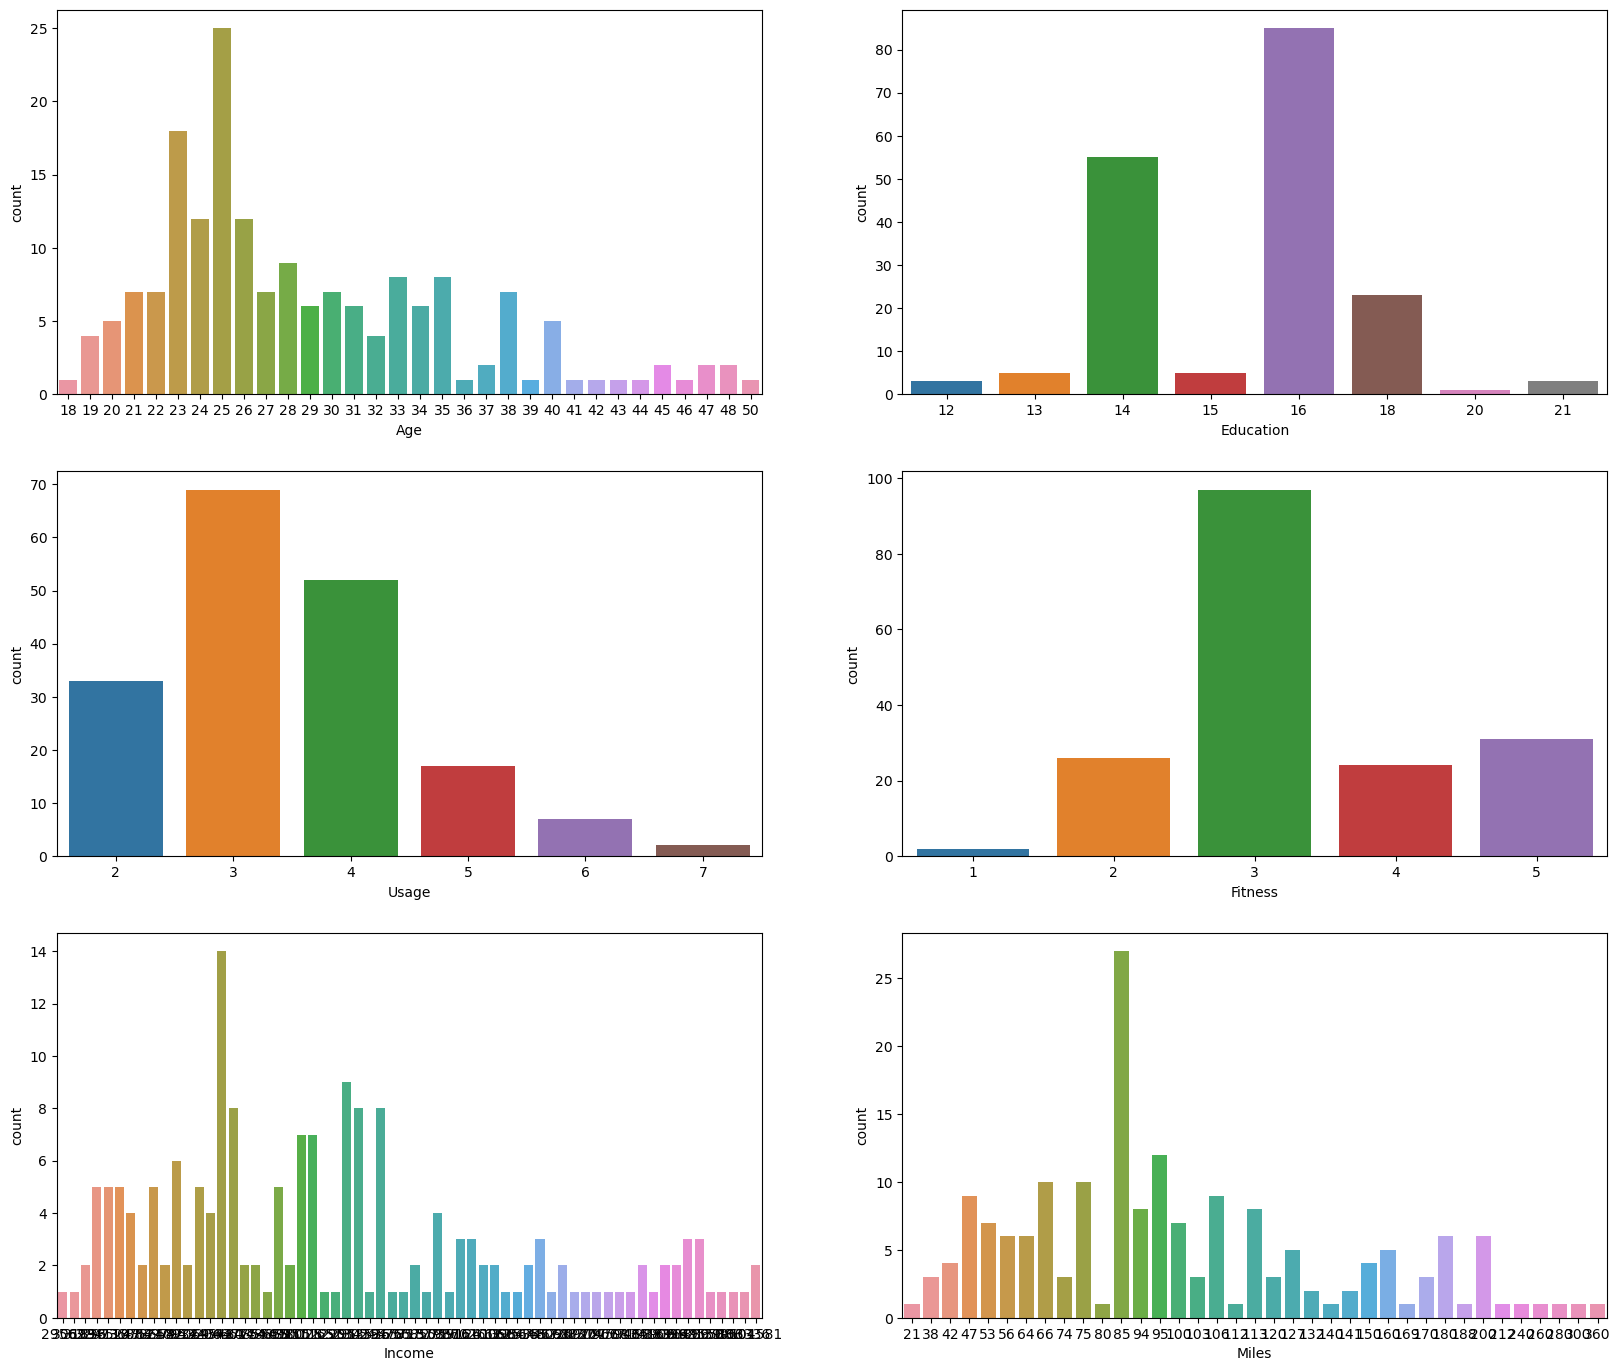

In [33]:
fig, axis = plt.subplots(nrows = 3, ncols = 2, figsize = (20, 12))
fig.subplots_adjust(top = 1.2)

sns.countplot(data = aerofit_treadmill_data, x = "Age", ax = axis[0,0])
sns.countplot(data = aerofit_treadmill_data, x = "Education", ax = axis[0,1])
sns.countplot(data = aerofit_treadmill_data, x = "Usage", ax = axis[1,0])
sns.countplot(data = aerofit_treadmill_data, x = "Fitness", ax = axis[1,1])
sns.countplot(data = aerofit_treadmill_data, x = "Income", ax = axis[2,0])
sns.countplot(data = aerofit_treadmill_data, x = "Miles", ax = axis[2,1])
plt.show()

#### Observations:

* Young people at age of 25 are more conscious about health and are using treadmills more than old aged people.